# Quantifying the impact of tenure on executive compensation, _a demonstration of statistical inference and hypothesis testing in linear regression_

In [36]:
# dataset publicly available here: http://fmwww.bc.edu/ec-p/data/wooldridge/ceosal2.dta

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# used to calculate critical value for t-tests
from scipy.stats import t

# used to get SE residual 
from statsmodels.tools.eval_measures import rmse

# used to get prediction interval bounds
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [37]:
ceosal_data=os.path.join(os.getcwd(),"ceosal2.dta")
df = pd.read_stata(ceosal_data)

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,264,63,1,0,42,3,334.0,43,480.0,5.575949,5.811141,6.173786,1764,9,12.874251
173,185,58,1,0,39,1,766.0,49,560.0,5.220356,6.641182,6.327937,1521,1,6.396867
174,387,71,1,1,32,13,432.0,28,477.0,5.958425,6.068426,6.167517,1024,169,6.481482
175,2220,63,1,1,18,18,277.0,-80,540.0,7.705263,5.624018,6.291569,324,324,-28.880867


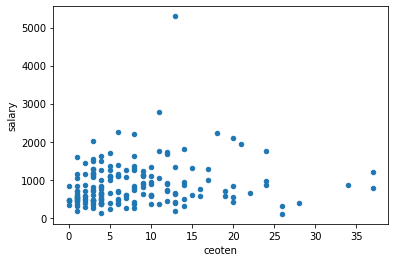

In [38]:
df.plot.scatter(x='ceoten',
                       y='salary')
display(df)

In [39]:
# fit model
results = smf.ols('salary ~ ceoten', data=df, subset=None).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.651
Date:                Sun, 28 Jun 2020   Prob (F-statistic):             0.0577
Time:                        15:10:12   Log-Likelihood:                -1377.4
No. Observations:                 177   AIC:                             2759.
Df Residuals:                     175   BIC:                             2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    772.4263     65.676     11.761      0.0

In [40]:
x = df["ceoten"]
y_true=df["salary"]
y_predict=results.predict()
fitted_values=results.fittedvalues

# influence statistics
infl = results.get_influence()
summary_table = infl.summary_table()
resid = results.resid

# residuals stats
get_predict = results.get_prediction()
var_resid = get_predict.var_resid
se_obs = get_predict.se_obs

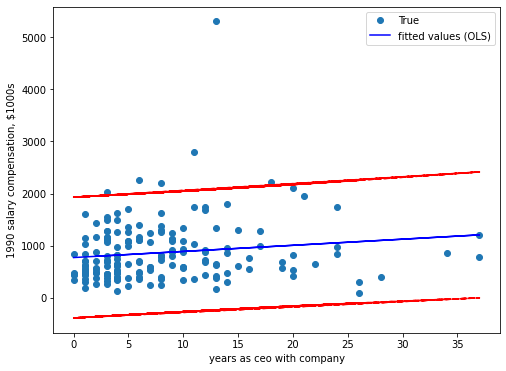

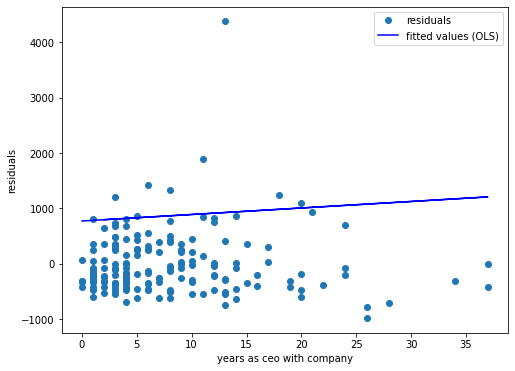

In [41]:
# plot fitted vs actual and include upper/lower bounds of prediction interval
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel('1990 salary compensation, $1000s')
plt.xlabel('years as ceo with company');

ax.plot(x, y_true, 'o', label="True")
ax.plot(x, fitted_values, 'b', label="fitted values (OLS)")

prstd, iv_l, iv_u = wls_prediction_std(results)
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

# plot the residuals
fig, ax = plt.subplots(figsize=(8,6))
plt.ylabel('residuals')
plt.xlabel('years as ceo with company')

ax.plot(x, resid, 'o', label="residuals")
ax.plot(x, fitted_values, 'b', label="fitted values (OLS)")
ax.legend(loc='best')

In [42]:
intercept_parameter = results.params[0]
slope_parameter = results.params[1]
print("intercept: " + str(intercept_parameter) + ", slope: " + str(slope_parameter))

intercept: 772.4262719908394, slope: 11.746129160242457


# Linear Model Summary and Evaluation

#### _Using the model described below and assuming normally distributed errors, the following point estimators are determined._

#### ${Y_i}={B_0}+{B_1}{X_i}+\epsilon_i$       $\epsilon \sim  \mathcal{N}(\mu,\,\sigma^{2})$


#### $\hat{B_0}$ = 772.4263 , $\hat{B_1}$ = 11.746


In [26]:
print("\nStandard Errors: \n")
print("SE of residual: " + str(rmse(y_true, y_predict)))
print("SE of intercept: " + str(results.bse[0]))
print("SE of slope: " + str(results.bse[1]))


Standard Errors: 

SE of residual: 579.9097469304737
SE of intercept: 65.67567395910909
SE of slope: 6.147739923394152


In [27]:
coefficient_confint=results.conf_int(alpha=0.05, cols=None)
print("\nConfidence Intervals: \n")
print("95% CI of intercept: (" + str(coefficient_confint[0][0]) + ", " + str(coefficient_confint[1][0]) + ")")
print("95% CI of slope: (" + str(coefficient_confint[0][1]) + ", " + str(coefficient_confint[1][1]) + ")")


Confidence Intervals: 

95% CI of intercept: (642.8079434181833, 902.0446005634955)
95% CI of slope: (-0.38712696539514724, 23.879385285880062)


## Hypothesis testing of intercept and slope point estimators



#### _hypothesis test for slope parameter:_                    _hypothesis test for intercept parameter:_
#### ${H_0}: {B_1}=0$                                                            ${H_0}: {B_0}=B_{0,0}$
#### ${H_1}: {B_1}\ne0$                                                            ${H_1}: {B_0}\ne{B_{0,0}}$



####  if  ${|t_0|}  >  {t_{\alpha/2}}$, then we can reject the null hypothesis.
_note: the critical value ${t_{\alpha/2}}$ is determined from the t-distribution with n-2 degrees of freedom_

In [28]:
# critical value for 95% confidence

alpha = 0.05
perc_statistical_confidence = 1 - alpha
degrees_freedom = len(df)-2
critical_value = t.ppf(perc_statistical_confidence, degrees_freedom)

# can confirm with cdf correct level of statistical confidence is returned 
t_cdf_probability = t.cdf(critical_value, degrees_freedom)
print("\ncritical value: " + str(critical_value))
print("statistical confidence: " + str(t_cdf_probability) + "\n")


critical value: 1.653607437078066
statistical confidence: 0.9499999999998792




### test outcomes: 
since ${|-4.26e^{-7}|}$  <  $1.65$, we **cannot** reject the null hypothesis that ${B_0}=B_{0,0}$. 
<br>
since ${|1.911|}$  >  $1.65$, we **can** reject the null hypothesis that ${B_1}=0$ with 95% statistical confidence.

In [29]:
hypotheses = 'Intercept = 772.4263, ceoten = 0'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           772.4263     65.676  -4.26e-07      1.000     642.808     902.045
c1            11.7461      6.148      1.911      0.058      -0.387      23.879


### interpretation: 
_these findings indicate that in 1990, the salary of a CEO before they had been with a company for a year is estimated to be around $772,426 on average._ <br>
_furthermore, it can be concluded with a high degree of statistical confidence that there is no direct relationship between a CEO's tenure and salary._

## F-test for significance of linear relationship


This tests that each coefficient is jointly statistically significantly different from zero. In layman's terms... <br><br>
**Null hypothesis:** The fit of the intercept-only model and the current model are equal. <br>
**Alternative hypothesis:** The fit of the intercept-only model is significantly reduced compared to the current model. <br>

####  if  ${|F_0|}  >  {F_{\alpha;1;175}}$, then we can reject the null hypothesis. 

In [30]:
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[3.65055227]]), p=0.057685549933601206, df_denom=175, df_num=1>


### test outcomes: 

In [31]:
print("significance level: " + str(results.fvalue))
print("p-value for F-test: " + str(results.f_pvalue))
print("\ntest outcome: " + str(results.fvalue > results.f_pvalue))

significance level: 3.6505522663470704
p-value for F-test: 0.05768554993360219

test outcome: True


### interpretation: 
_The results of the F-test lead us to reject the null hypothesis and conclude that this model provides a better fit than the intercept-only model. It also qualifies the significance of $R^{2}$ (~0.02). <br> 
It can be statistically concluded that 2.04% of the variation in CEO annual compensation is due to factors explained by this model.<br> 
The remaining 97.96% of variation is due to factors unexplained by the model._

## Analysis of the residuals

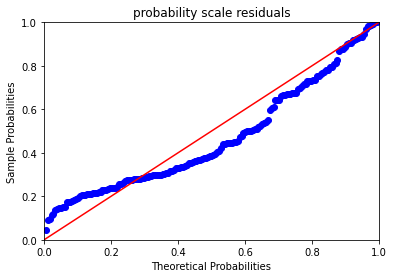

Text(0.5, 1.0, 'residuals distribution')

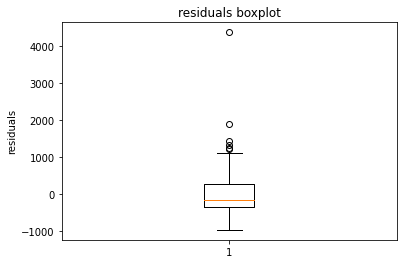

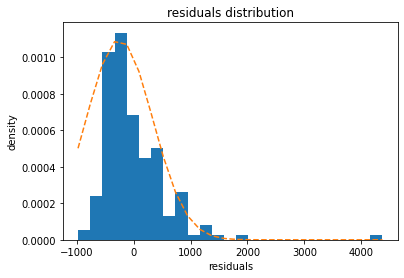

In [32]:
# white paper that discusses probability scale residuals: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5364820/

resid_prob = sm.ProbPlot(resid, fit=True)
fig = resid_prob.ppplot(line='45')
h = plt.title('probability scale residuals')
plt.show()


# residuals boxplot 

fig1, ax1 = plt.subplots()
ax1.set_ylabel("residuals")
ax1.boxplot(resid)
plt.title('residuals boxplot')


# histogram distribution 

mu, sigma, num_bins = resid.mean(), resid.std(), 25
x = mu + sigma 

fig, ax = plt.subplots()
n, bins, patches = ax.hist(resid, num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     1.6*np.exp(-0.5 * (1 / sigma * (bins + mu + 250))**2))

ax.plot(bins, y, "--")
ax.set_xlabel("residuals")
ax.set_ylabel("density")
plt.title('residuals distribution')


### Conclusion:

From these figures, it is clear that this linear model is a poor fit.<br>
1) The probability scale residuals diverge considerably from a tight linear trend. <br>
2) The boxplot, though symmetrical, has many outliers. <br>
3) The histogram shows a non-symmetrical, non-normal distribution. <br>

These three graphs bring into question the normality of the residuals (an important assumption for OLS) and seem to indicate that errors are not independently distributed.<br> 
If the errors are heteroskedastic they will require the use of a weighted least squares approach.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.651
Date:                Sun, 28 Jun 2020   Prob (F-statistic):             0.0577
Time:                        09:00:21   Log-Likelihood:                -1377.4
No. Observations:                 177   AIC:                             2759.
Df Residuals:                     175   BIC:                             2765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    772.4263     65.676     11.761      0.000     642.808     902.045
ceoten        11.7461      6.148      1.911      0.058      -0.387      23.879
==============================================================================
Omnibus:                      146.588   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2417.065
Skew:                           2.933   Prob(JB):                         0.00
Kurtosis:                      20.127   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# print dependencies

%load_ext watermark

# python, packages, and machine characteristics 
%watermark -v -m -p pandas,numpy,matplotlib,statsmodels,watermark 

# date
print(" ") 
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.6
IPython 7.15.0

pandas 1.0.5
numpy 1.19.0
matplotlib 3.2.2
statsmodels 0.11.1
watermark 2.0.2

compiler   : Clang 11.0.0 (clang-1100.0.33.16)
system     : Darwin
release    : 18.7.0
machine    : x86_64
processor  : i386
CPU cores  : 12
interpreter: 64bit
 
last updated: Sun Jun 28 2020 17:24:18 CDT
